In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gokulrajkmv/unemployment-in-india")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'unemployment-in-india' dataset.
Path to dataset files: /kaggle/input/unemployment-in-india


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [25]:
df = pd.read_csv("/content/Unemployment in India.csv")
df.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [26]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


#Data Cleaning and Feature Enginnering

In [27]:
df.columns = df.columns.str.strip()


In [28]:
df['Date'] = pd.to_datetime(df['Date'])


/tmp/ipython-input-3386729631.py:1: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [29]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month


#Overall Unemployment Trend (Time-Series Analysis)

/tmp/ipython-input-3245155206.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


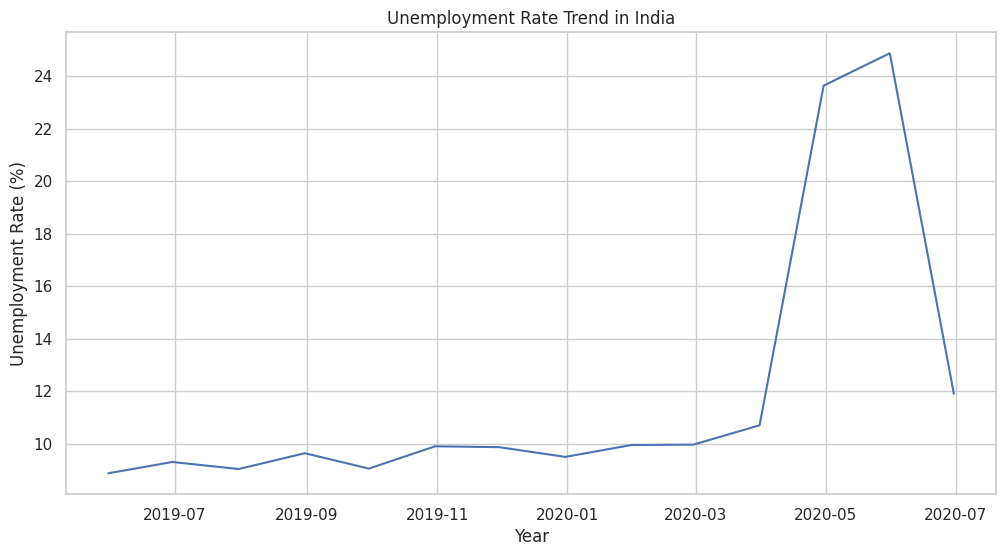

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=df,
    x='Date',
    y='Estimated Unemployment Rate (%)',
    ci=None
)
plt.title("Unemployment Rate Trend in India")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Insight

Unemployment remains relatively stable before 2020

A sharp spike is observed during 2020, coinciding with Covid-19 lockdowns

#Covid-19 Impact Analysis

In [31]:
pre_covid = df[df['Year'] < 2020]
post_covid = df[df['Year'] >= 2020]


compare avg Unemployment Rate

In [32]:
pre_avg = pre_covid['Estimated Unemployment Rate (%)'].mean()
post_avg = post_covid['Estimated Unemployment Rate (%)'].mean()

print("Pre-Covid Avg Unemployment:", pre_avg)
print("Post-Covid Avg Unemployment:", post_avg)


Pre-Covid Avg Unemployment: 9.399046511627906
Post-Covid Avg Unemployment: 15.10158064516129


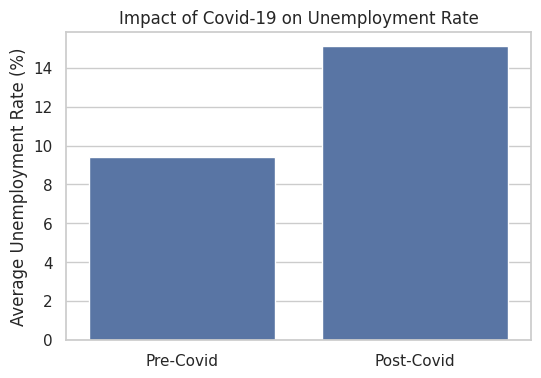

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(
    x=['Pre-Covid', 'Post-Covid'],
    y=[pre_avg, post_avg]
)
plt.title("Impact of Covid-19 on Unemployment Rate")
plt.ylabel("Average Unemployment Rate (%)")
plt.show()


Insight

Post-Covid unemployment is significantly higher

Confirms the severe labor market disruption caused by the pandemic

#Regional Unemployment Analysis

In [34]:
region_avg = (
    df.groupby('Region')['Estimated Unemployment Rate (%)']
    .mean()
    .sort_values(ascending=False)
)
region_avg


,Estimated Unemployment Rate (%)
Region,
Tripura,28.350357
Haryana,26.283214
Jharkhand,20.585000
Bihar,18.918214
Himachal Pradesh,18.540357
Delhi,16.495357
Jammu & Kashmir,16.188571
Chandigarh,15.991667
Rajasthan,14.058214


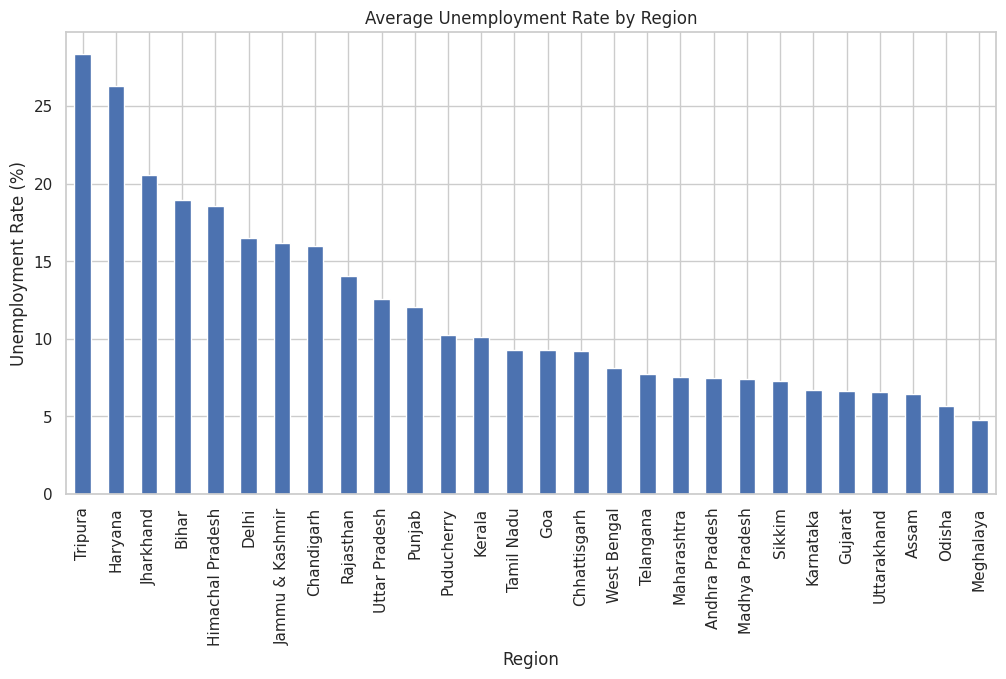

In [35]:
plt.figure(figsize=(12,6))
region_avg.plot(kind='bar')
plt.title("Average Unemployment Rate by Region")
plt.ylabel("Unemployment Rate (%)")
plt.show()


Insight

Some regions consistently show higher unemployment

Indicates regional economic imbalance

Highlights areas needing focused employment programs

#Seasonal / Monthly Trend Analysis

In [36]:
monthly_avg = df.groupby('Month')['Estimated Unemployment Rate (%)'].mean()
monthly_avg


,Estimated Unemployment Rate (%)
Month,
1.0,9.950755
2.0,9.964717
3.0,10.700577
4.0,23.641569
5.0,16.646190
6.0,10.553462
7.0,9.033889
8.0,9.637925
9.0,9.051731


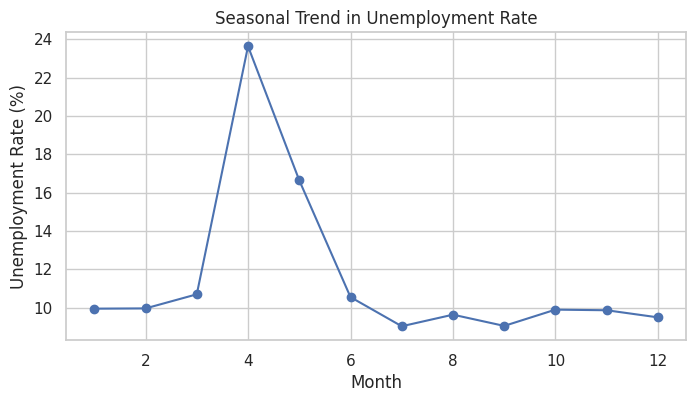

In [37]:
plt.figure(figsize=(8,4))
monthly_avg.plot(marker='o')
plt.title("Seasonal Trend in Unemployment Rate")
plt.xlabel("Month")
plt.ylabel("Unemployment Rate (%)")
plt.show()


**Insight**

Unemployment fluctuates across months

Suggests dependence on seasonal and informal employment sectors




Key Findings:

1. Covid-19 caused a sharp rise in unemployment across India.

2. Although recovery is visible, unemployment remains volatile.

3. Regional disparities indicate uneven economic development.

4. Seasonal patterns suggest temporary employment cycles.







Policy Implications:

Strengthening social security during economic shocks is essential.

High-unemployment regions require targeted skill-development initiatives.

Seasonal employment trends highlight the need for income support programs.

Continuous labor market monitoring can help policymakers respond proactively.

**Final conclusion**

This analysis demonstrates how unemployment data can be leveraged to understand labor market dynamics and guide policy decisions. The Covid-19 pandemic significantly disrupted employment trends, emphasizing the importance of resilient economic and social support systems.